In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

uploaded = files.upload()

Saving data2.csv to data2 (1).csv


Загрузка данных

In [ ]:
data = np.genfromtxt('data2.csv', delimiter=';', skip_header=1)
print(data)

[[ 0.2        -6.57266488]
 [ 0.4        -5.37046782]
 [ 0.6        -3.15858504]
 [ 0.8        -1.48270657]
 [ 1.         -0.12384439]
 [ 1.2         2.40389623]
 [ 1.4         4.14683298]
 [ 1.6         6.32790239]
 [ 1.8         8.82291549]
 [ 2.         10.88542758]
 [ 2.2        13.31557662]
 [ 2.4        15.47213024]
 [ 2.6        17.26743396]
 [ 2.8        18.81843147]
 [ 3.         20.6263378 ]
 [ 3.2        23.04006768]
 [ 3.4        23.92053257]
 [ 3.6        25.32216894]
 [ 3.8        26.52298732]
 [ 4.         26.76261011]
 [ 4.2        27.65896563]
 [ 4.4        27.35973442]
 [ 4.6        27.37007024]
 [ 4.8        26.15215361]
 [ 5.         25.23920411]]


1. x - скидка (первый столбец)
y - прибыль (второй столбец)
Выберем точки

In [ ]:
x = data[:, 0]
y = data[:, 1]

n = len(x)
point1 = 0
point2 = n // 2
point3 = -1

selected_points = [point1, point2, point3]
selected_x = x[selected_points]
selected_y = y[selected_points]

for i in range(3):
    print(f"x={selected_x[i]}, y={selected_y[i]:.2f}")

x=0.2, y=-6.57
x=2.6, y=17.27
x=5.0, y=25.24


2) Решаем СЛУ f(x) = a₂x² + a₁x + a₀ для выбранных точек

In [ ]:
polinom = np.array([
    [selected_x[0]**2, selected_x[0], 1],
    [selected_x[1]**2, selected_x[1], 1],
    [selected_x[2]**2, selected_x[2], 1]
])
fx = selected_y

coefficients_quad = solve(polinom, fx)
a2, a1, a0 = coefficients_quad
print(coefficients_quad)

[-1.37745909 13.79025996 -9.27561851]


3. Получаем вектор значений построенного полинома для заданных точек.

In [ ]:
vector_of_values = a2*x**2 + a1*x + a0
print(vector_of_values)

[-6.57266488 -3.97990798 -1.49734781  0.87501564  3.13718236  5.28915236
  7.33092563  9.26250217 11.08388198 12.79506506 14.39605142 15.88684106
 17.26743396 18.53783014 19.69802959 20.74803231 21.68783831 22.51744758
 23.23686012 23.84607594 24.34509503 24.73391739 25.01254302 25.18097193
 25.23920411]


4. Построим в одной области два графика: один по заданным в файле
точкам, другой – по полученному вектору.

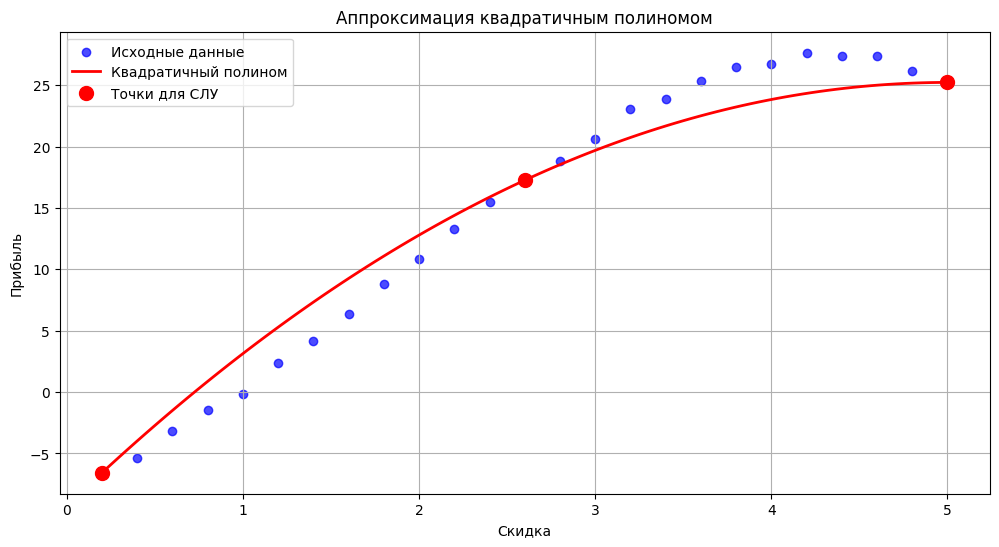

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.7, label='Исходные данные', color='blue')

x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth_quad = a2*x_smooth**2 + a1*x_smooth + a0
plt.plot(x_smooth, y_smooth_quad, color='red', linewidth=2, label='Квадратичный полином')

plt.scatter(selected_x, selected_y, color='red', s=100, zorder=5, label='Точки для СЛУ')

plt.xlabel('Скидка')
plt.ylabel('Прибыль')
plt.title('Аппроксимация квадратичным полиномом')
plt.legend()
plt.grid(True)
plt.show()

5. Посчитаем значение квадратичного отклонения RSS

In [ ]:
RSS = np.sum((y - vector_of_values)**2)
print(f"{RSS:.4f}")

120.7875


6. Повторим шаги 1-5 для полинома 3й степени (для этого нужно будет
выбрать 4 точки).

Выбранные точки:
x=0.20, y=-6.57
x=1.80, y=8.82
x=3.40, y=23.92
x=5.00, y=25.24

Коэффициенты кубического полинома:
[-0.54854257  2.90393393  5.81106484 -7.84664687]



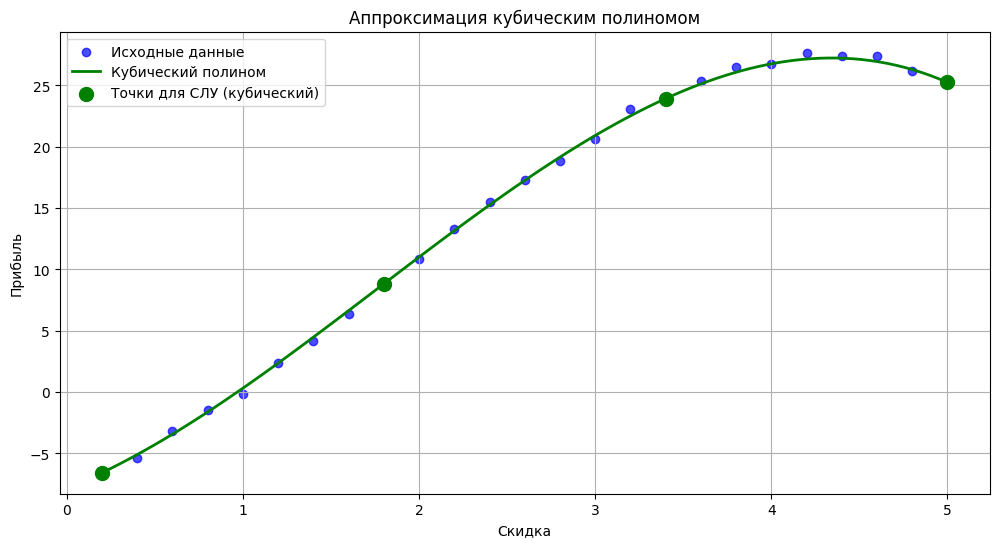


RSS: 1.8784


In [ ]:
selected_points_cubic = [0, n//3, 2*n//3, -1]
selected_x_cubic = x[selected_points_cubic]
selected_y_cubic = y[selected_points_cubic]

print("Выбранные точки:")
for i in range(4):
    print(f"x={selected_x_cubic[i]:.2f}, y={selected_y_cubic[i]:.2f}")

polinom_cubic = np.array([
    [selected_x_cubic[0]**3, selected_x_cubic[0]**2, selected_x_cubic[0], 1],
    [selected_x_cubic[1]**3, selected_x_cubic[1]**2, selected_x_cubic[1], 1],
    [selected_x_cubic[2]**3, selected_x_cubic[2]**2, selected_x_cubic[2], 1],
    [selected_x_cubic[3]**3, selected_x_cubic[3]**2, selected_x_cubic[3], 1]
])
fx_cubic = selected_y_cubic

coefficients_cubic = solve(polinom_cubic, fx_cubic)
a3_cubic, a2_cubic, a1_cubic, a0_cubic = coefficients_cubic

print(f"\nКоэффициенты кубического полинома:")
print(coefficients_cubic)
print()

vector_of_values_cubic = a3_cubic*x**3 + a2_cubic*x**2 + a1_cubic*x + a0_cubic

plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.7, label='Исходные данные', color='blue')

x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth_cubic = a3_cubic*x_smooth**3 + a2_cubic*x_smooth**2 + a1_cubic*x_smooth + a0_cubic
plt.plot(x_smooth, y_smooth_cubic, color='green', linewidth=2, label='Кубический полином')

plt.scatter(selected_x_cubic, selected_y_cubic, color='green', s=100, zorder=5, label='Точки для СЛУ (кубический)')

plt.xlabel('Скидка')
plt.ylabel('Прибыль')
plt.title('Аппроксимация кубическим полиномом')
plt.legend()
plt.grid(True)
plt.show()

RSS_cubic = np.sum((y - vector_of_values_cubic)**2)
print()
print(f"RSS: {RSS_cubic:.4f}")

8. Сделаем прогноз

In [ ]:
x_new = np.array([6.0, 8.0])

if RSS < RSS_cubic:
    print(f"\nЛучший: квадратичный полином (RSS = {RSS:.4f})")
    vector_of_values_new = a2*x_new**2 + a1*x_new + a0
else:
    print(f"\nЛучший: кубический полином (RSS = {RSS_cubic:.4f})")
    vector_of_values_new = a3_cubic*x_new**3 + a2_cubic*x_new**2 + a1_cubic*x_new + a0_cubic

print(f"\nПрогноз прибыли:")
for i in range(2):
    print(f"Скидка {x_new[i]}%: прибыль = {vector_of_values_new[i]:.2f}")


Лучший: кубический полином (RSS = 1.8784)

Прогноз прибыли:
Скидка 6.0%: прибыль = 13.08
Скидка 8.0%: прибыль = -56.36
